<a href="https://colab.research.google.com/github/younglaecho/learn_machine_learning/blob/main/chap05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결정트리



### 로지스틱 회귀로 예측하기

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [3]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [5]:
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(5197, 3) (1300, 3) (5197,) (1300,)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga')
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


로지스틱 회귀의 결과는 0.77로 과소적합된 결과를 보여준다.<Br>
이와는 별개로 로지스틱 회귀는 설명하기 힘든 머신러닝 알고리즘이다.<br>
정확한 기준점을 통해 결정하는 머신러닝 알고리즘은 없을까?<br>
그것이 바로 결정트리 알고리즘이다.

### 결정트리 알고리즘
결정트리 알고리즘은 변수별로 어떤 기준을 나누어서 학습하는 방식이다.

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8523076923076923


훈련세트에 대한 점수가 매우 높다. => 과대적합<br>
아래의 그림을 통해 어떤 결정트리가 만들어졌는지 확인해볼 수 있습니다.

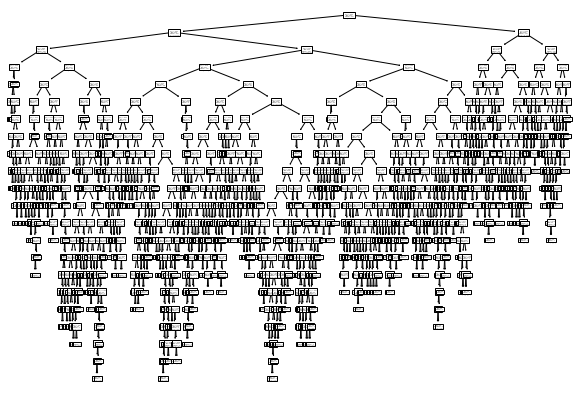

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

너무 복잡하니 깊이를 제한하여 출력해 보겠습니다.

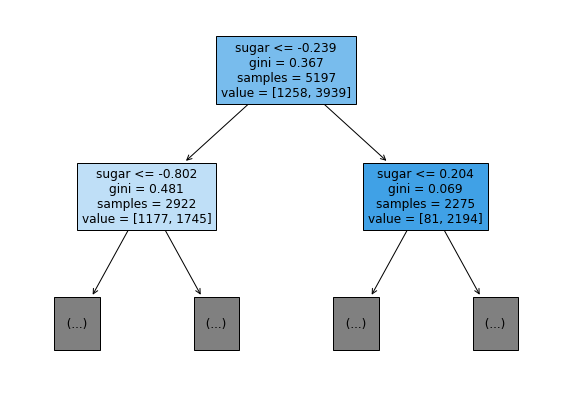

In [10]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


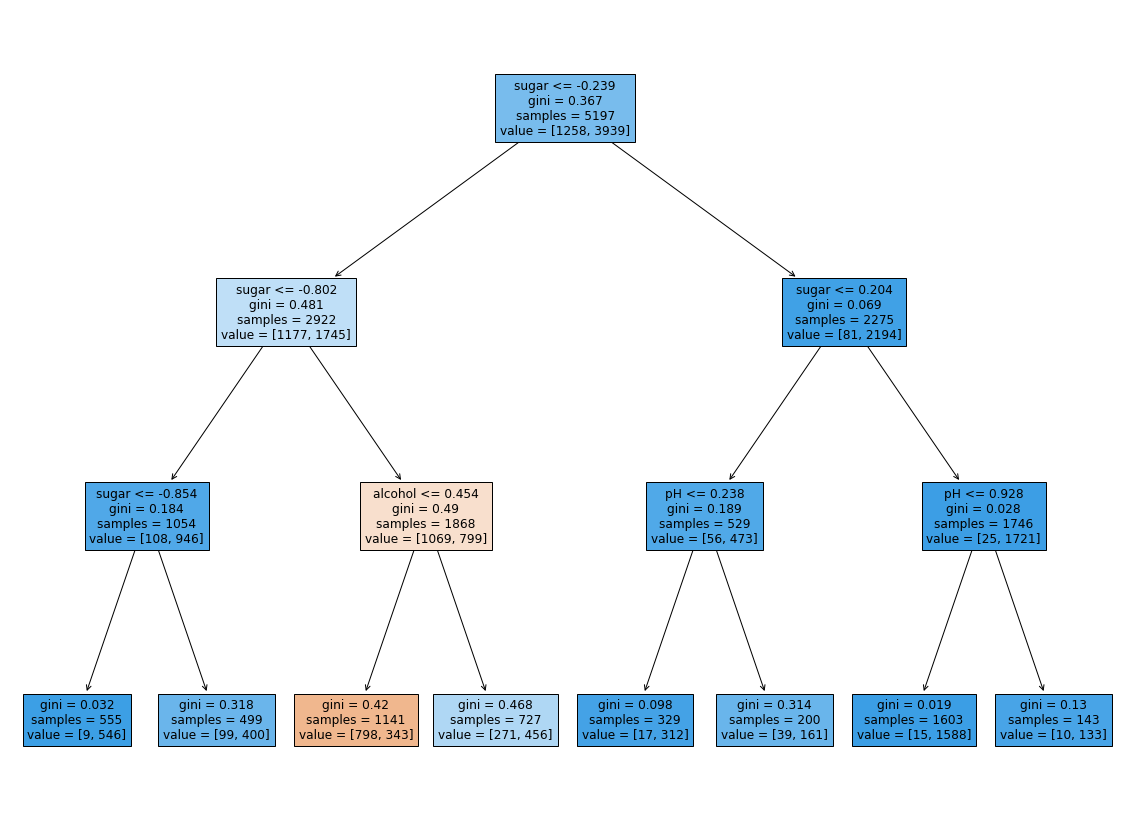

In [17]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

결정트리 알고리즘에서는 특성값을 스케일이 결과에 영향을 미치지 않습니다.<br>
따라서 더 직관적인 결과를 얻고자 한다면, 스케일을 유지한 채 결과를 내는 것이 좋습니다.

In [18]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


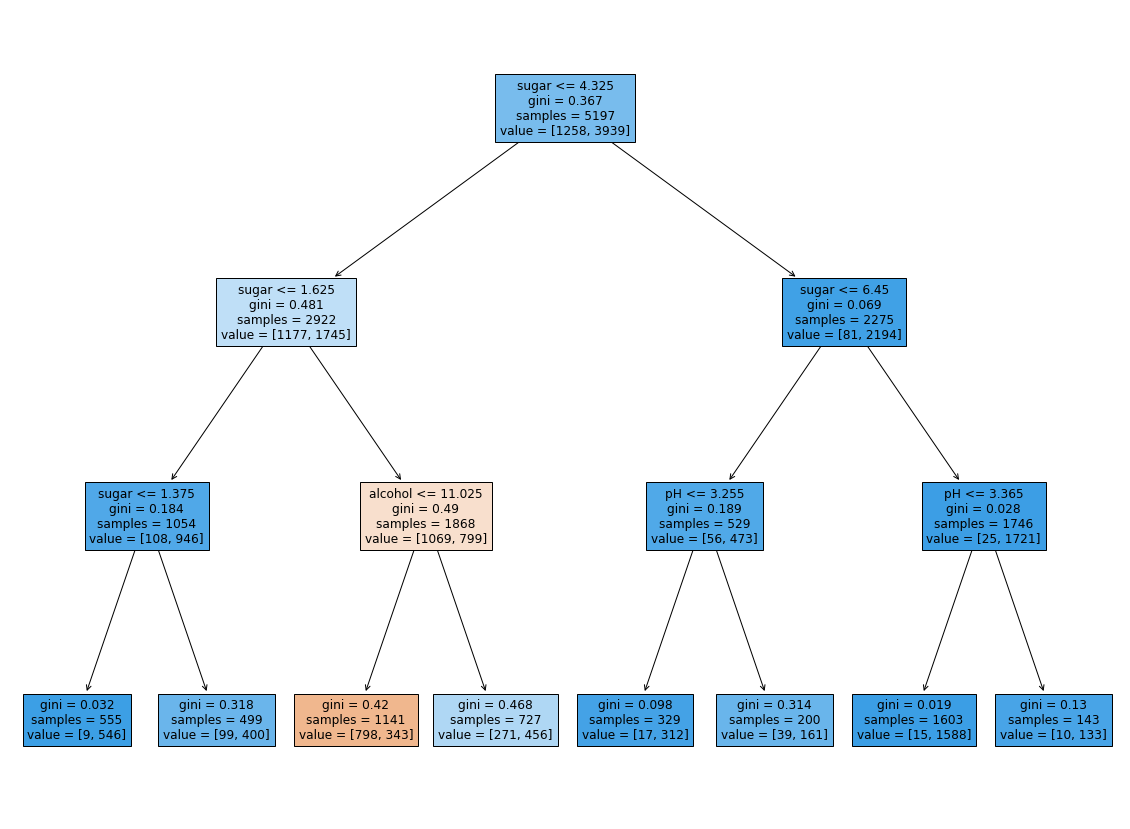

In [19]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [20]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


0.8874350586877044
0.8615384615384616


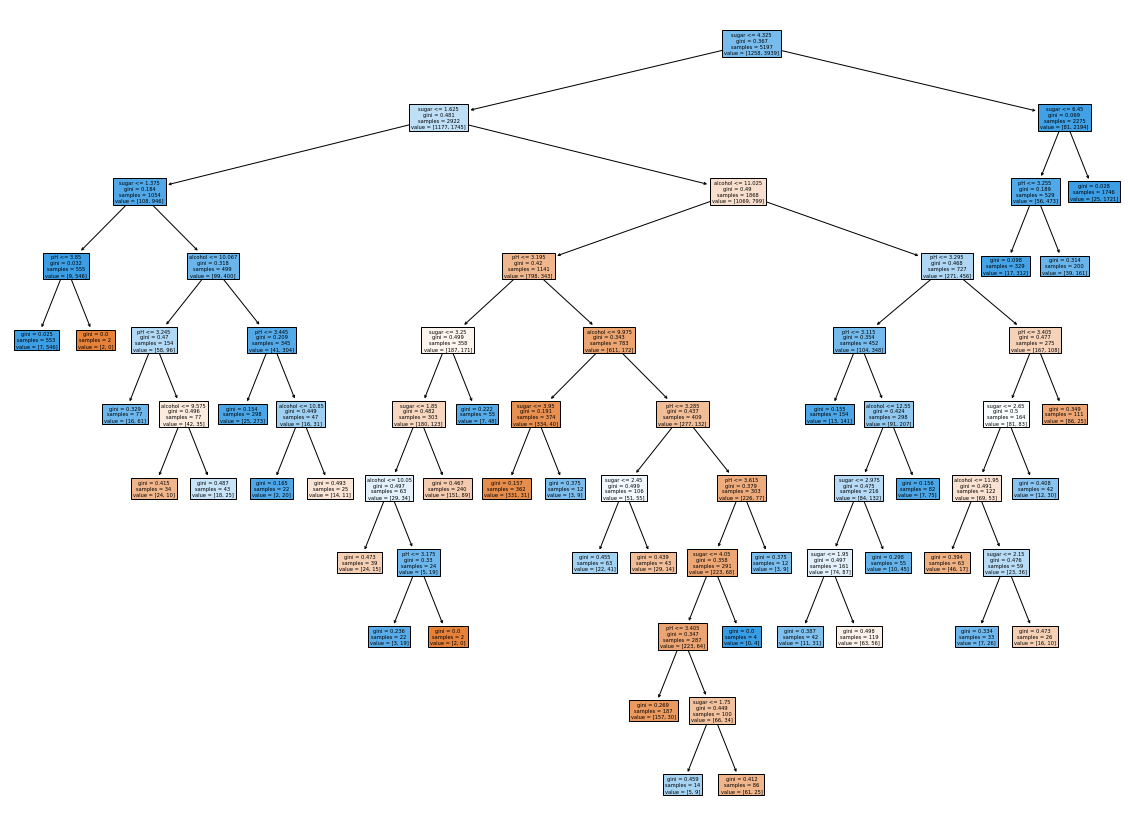

In [29]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()